<a href="https://colab.research.google.com/github/lekshmi29-lx/DSA_workB7/blob/main/iris_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
data_iris = data.drop('species',axis=1)
data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
data_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data_iris.shape

(150, 4)

In [ ]:
data_iris.nunique()

,0
sepal_length,35
sepal_width,23
petal_length,43
petal_width,22


In [ ]:
data_iris.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0


In [ ]:
#for i in data_iris:
  #plt.figure(figsize=(10,5))
  #sns.histplot(data = data_iris,x=i,kde=True)
  #plt.title(i)

In [ ]:
#for i in data_iris:
  #plt.figure(figsize=(10,5))
  #plt.boxplot(data_iris[i])
  #plt.title(i)

In [ ]:
data_iris['sepal_width'] = winsorize(data_iris['sepal_width'],limits=(0.01,0.02))
#plt.figure(figsize=(10,5))
#plt.boxplot(data_iris['sepal_width'])
#plt.title('sepal_width')

In [ ]:
skew_value = data_iris.skew()
print(skew_value)

sepal_length    0.314911
sepal_width     0.197612
petal_length   -0.274884
petal_width    -0.102967
dtype: float64


In [ ]:
data_iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.121342,0.871754,0.817941
sepal_width,-0.121342,1.000000,-0.429714,-0.366835
petal_length,0.871754,-0.429714,1.000000,0.962865
petal_width,0.817941,-0.366835,0.962865,1.000000


In [ ]:
minmax_scale = MinMaxScaler()
std_scale = StandardScaler()
data_iris['petal_length'] = minmax_scale.fit_transform(data_iris[['petal_length']])
data_iris['petal_width'] = minmax_scale.fit_transform(data_iris[['petal_width']])
data_iris['sepal_width'] = std_scale.fit_transform(data_iris[['sepal_width']])
data_iris['sepal_length'] = std_scale.fit_transform(data_iris[['sepal_length']])

In [ ]:
#x = data_iris[['sepal_length','sepal_width']]

In [ ]:
#std_scale = StandardScaler()
#data_scaled = std_scale.fit_transform(x)

Kmean Clustering

In [ ]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,12):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(data_iris)
  wcss.append(kmeans.inertia_) # inertia - stored the calculated distance parameter

wcss

[328.36835321972706,
 241.87484340091385,
 104.14754125306176,
 87.41329875871415,
 65.76972511257202,
 58.28638508296215,
 47.97540838233988,
 43.822505480799094,
 36.339165451189224,
 33.24334787738523,
 24.622251798518995]

Text(0.5, 0, 'Number of clusters')

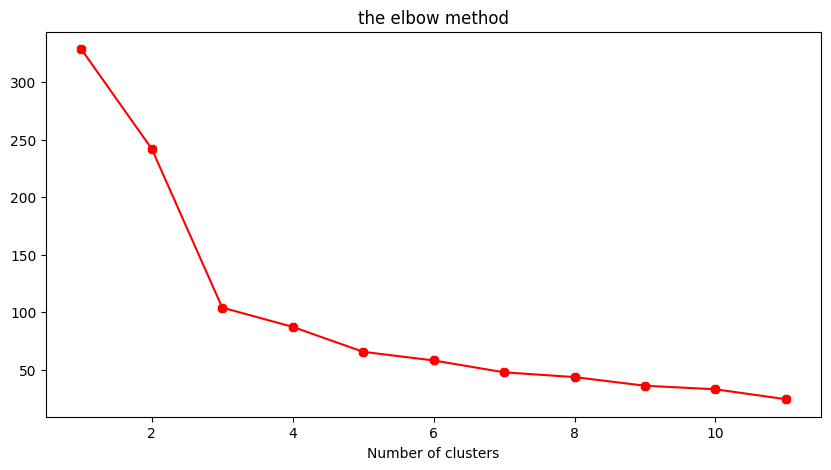

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(range(1,12),wcss,color='red',marker='8')
plt.title('the elbow method')
plt.xlabel('Number of clusters')

In [ ]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3,random_state=42)
labels = kmeans.fit_predict(data_iris)

score = silhouette_score(data_iris,labels)
print('Silhouette Score:',score)

Silhouette Score: 0.4448957606089018


In [ ]:
data_iris1=data_iris.copy()

In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
kmeans.fit(data_iris)
data_iris1['Cluster'] = kmeans.predict(data_iris)
data_iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,-0.900681,1.063260,0.067797,0.041667,2
1,-1.143017,-0.128735,0.067797,0.041667,2
2,-1.385353,0.348063,0.050847,0.041667,2
3,-1.506521,0.109664,0.084746,0.041667,2
4,-1.021849,1.301659,0.067797,0.041667,2


In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
data_iris1['Cluster'].value_counts()

,count
Cluster,
1,52
2,49
0,49


In [ ]:
kmeans.cluster_centers_

array([[ 1.10971635,  0.10966357,  0.75060533,  0.76190476],
       [-0.10143926, -0.96313221,  0.56681877,  0.54647436],
       [-1.00206653,  0.91243592,  0.07886544,  0.06037415]])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

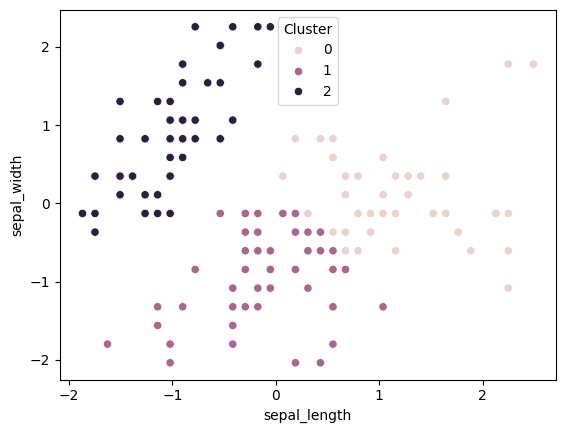

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='Cluster', data=data_iris1)

Hierarchy Clustering

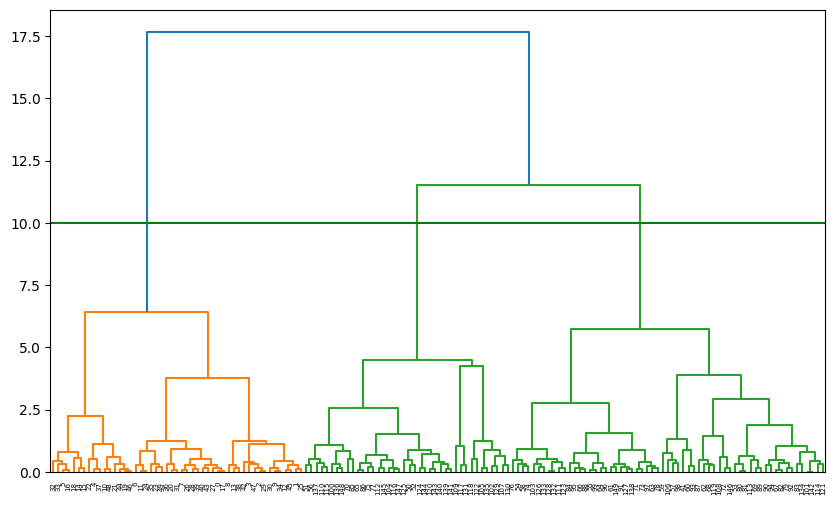

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

mergings = linkage(data_iris,method='ward')

plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(10,color='green')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
new_cluster_labels = agg_hc.fit_predict(data_iris)
new_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [ ]:
data_iris1['agle_cluster'] = new_cluster_labels
data_iris1

,sepal_length,sepal_width,petal_length,petal_width,Cluster,agle_cluster
0,-0.900681,1.063260,0.067797,0.041667,2,0
1,-1.143017,-0.128735,0.067797,0.041667,2,0
2,-1.385353,0.348063,0.050847,0.041667,2,0
3,-1.506521,0.109664,0.084746,0.041667,2,0
4,-1.021849,1.301659,0.067797,0.041667,2,0
...,...,...,...,...,...,...
145,1.038005,-0.128735,0.711864,0.916667,0,2
146,0.553333,-1.320731,0.677966,0.750000,1,1
147,0.795669,-0.128735,0.711864,0.791667,0,2
148,0.432165,0.824861,0.745763,0.916667,0,2


In [ ]:
data_iris1['agle_cluster'].value_counts()

,count
agle_cluster,
1,61
0,49
2,40


In [ ]:
score = silhouette_score(data_iris,new_cluster_labels)
print('Silhouette Score:',score)

Silhouette Score: 0.4475330805763578
